In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy as sp

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [3]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [4]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams']).drop(['code','strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away','team_division','unavailable','pulse_id'], axis=1)

In [5]:
teams_df.columns

Index(['draw', 'form', 'id', 'loss', 'name', 'played', 'points', 'position',
       'short_name', 'strength', 'win'],
      dtype='object')

In [6]:
teams = teams_df[['id','name','short_name','strength']]
teams.head(5)

,id,name,short_name,strength
0,1,Arsenal,ARS,4
1,2,Aston Villa,AVL,3
2,3,Brentford,BRE,2
3,4,Brighton,BHA,3
4,5,Burnley,BUR,2


In [7]:
#elements_df.columns

In [8]:
players = elements_df[['first_name','second_name','id','now_cost','minutes','total_points','points_per_game','form','value_form','goals_scored','assists',
                       'clean_sheets','bonus','team', 'element_type']]
players.columns = ['Name_First','Name','id','Cost','Min','P','PPG','F','VF','G','A','CS','B','Team','Pos']
players.loc[:,'Cost'] = players.loc[:,'Cost']/10
players.loc[:,'PPG'] = players['PPG'].astype('float')
players.loc[:,'Pos'] = players['Pos'].map(elements_types_df.set_index('id').singular_name_short)
players.loc[:,'Team'] = players['Team'].map(teams.set_index('id').short_name)
players.head(5)

C:\Users\matst\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Name_First,Name,id,Cost,Min,P,PPG,F,VF,G,A,CS,B,Team,Pos
0,Bernd,Leno,1,4.5,270,4,1.3,0.0,0.0,0,0,0,0,ARS,GKP
1,Rúnar Alex,Rúnarsson,2,4.0,0,0,0.0,0.0,0.0,0,0,0,0,ARS,GKP
2,Willian,Borges Da Silva,3,6.3,0,0,0.0,0.0,0.0,0,0,0,0,ARS,MID
3,Pierre-Emerick,Aubameyang,4,9.6,1036,44,3.1,0.0,0.0,4,1,6,7,ARS,FWD
4,Cédric,Soares,5,4.2,469,12,1.7,3.3,0.8,0,0,1,0,ARS,DEF


## Some Info, can sort by form, PPG, position, etc.

In [9]:
#[players['Team']=='LIV'][players['Pos']=='DEF']
#players[players['Min']>400].sort_values('PPG', ascending=False).head(20)
players['PP90'] = 90*round(players['P']/(players['Min']+1),3)
players[(players['Min']>400) & (players['Cost']<8)].sort_values('F', ascending=False).head(20)

C:\Users\matst\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name_First,Name,id,Cost,Min,P,PPG,F,VF,G,A,CS,B,Team,Pos,PP90
189,Thiago,Emiliano da Silva,121,5.6,1732,100,4.8,8.0,1.4,3,1,8,13,CHE,DEF,5.22
364,Joel,Matip,224,4.9,1890,94,4.5,7.8,1.6,1,1,11,4,LIV,DEF,4.50
369,Virgil,van Dijk,229,6.7,2160,130,5.4,7.5,1.1,3,2,14,9,LIV,DEF,5.40
652,Craig,Dawson,414,4.9,1881,69,2.9,7.0,1.4,2,1,5,1,WHU,DEF,3.33
200,Andreas,Christensen,133,4.6,1089,48,3.4,7.0,1.5,0,0,6,2,CHE,DEF,3.96
658,Jarrod,Bowen,420,7.1,2308,152,5.6,7.0,1.0,8,13,7,16,WHU,MID,5.94
542,Che,Adams,345,7.0,1375,83,4.2,6.8,1.0,7,3,5,11,SOU,FWD,5.40
371,Alisson,Ramses Becker,231,6.0,2160,114,4.8,6.8,1.1,0,1,13,8,LIV,GKP,4.77
374,Andrew,Robertson,234,7.2,1664,118,6.2,6.5,0.9,1,10,10,16,LIV,DEF,6.39
461,Joseph,Willock,19,5.7,1487,58,2.8,6.5,1.1,2,1,5,3,NEW,MID,3.51


In [10]:
players[(players['Team']=='WOL') & (players['P']>50)]

,Name_First,Name,id,Cost,Min,P,PPG,F,VF,G,A,CS,B,Team,Pos,PP90
676,João Filipe Iria,Santos Moutinho,426,4.9,1896,71,3.1,0.6,0.1,2,1,9,7,WOL,MID,3.33
679,Conor,Coady,429,4.8,2326,101,3.9,2.6,0.5,2,0,9,6,WOL,DEF,3.87
680,Raúl,Jiménez,430,7.5,1918,78,3.2,3.0,0.4,5,4,9,9,WOL,FWD,3.69
681,Romain,Saïss,431,5.0,2108,93,3.9,2.4,0.5,2,0,9,6,WOL,DEF,3.96
682,Fernando,Marçal,432,4.2,1093,52,3.7,1.0,0.2,0,2,5,3,WOL,DEF,4.32
684,Leander,Dendoncker,434,4.7,1234,52,2.4,4.6,1.0,1,3,4,3,WOL,MID,3.78
686,Rúben Diogo,da Silva Neves,436,5.3,1974,66,2.8,2.8,0.5,3,1,7,4,WOL,MID,2.97
687,Nélson,Cabral Semedo,437,4.8,1989,91,4.0,3.6,0.8,0,1,9,9,WOL,DEF,4.14
689,Max,Kilman,439,4.6,2340,93,3.6,2.8,0.6,1,1,9,3,WOL,DEF,3.60
699,Rayan,Ait Nouri,470,4.4,1192,62,4.1,1.6,0.4,0,3,6,6,WOL,DEF,4.68


In [11]:
teams['Points']= teams['short_name'].map(lambda x: players[players['Team']==x]['P'].sum())

teams['HS'] = teams['short_name'].map(lambda x: players[players['Team']==x].sort_values('P',ascending=False)['Name'].iloc[0])
teams['HS_pts'] = teams['short_name'].map(lambda x: players[players['Team']==x]['P'].sort_values(ascending=False).iloc[0])
teams['H_frac'] = teams['HS_pts']/teams['Points']

teams['HS2'] = teams['short_name'].map(lambda x: players[players['Team']==x].sort_values('P',ascending=False)['Name'].iloc[1])
teams['HS2_pts'] = teams['short_name'].map(lambda x: players[players['Team']==x]['P'].sort_values(ascending=False).iloc[1])
teams['H2_frac'] = teams['HS2_pts']/teams['Points']

teams['G'] = teams['short_name'].map(lambda x: players[players['Team']==x]['G'].sum())
teams['A'] = teams['short_name'].map(lambda x: players[players['Team']==x]['A'].sum())
teams['CS'] = teams['short_name'].map(lambda x: players[players['Team']==x]['CS'].max())
teams['TS'] = teams['short_name'].map(lambda x: players[players['Team']==x]['G'].max())
teams['TA'] = teams['short_name'].map(lambda x: players[players['Team']==x]['A'].max())

players['G+A']=players['G']+players['A']
teams.head(5)

C:\Users\matst\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,id,name,short_name,strength,Points,HS,HS_pts,H_frac,HS2,HS2_pts,H2_frac,G,A,CS,TS,TA
0,1,Arsenal,ARS,4,1150,Saka,110,0.095652,Ramsdale,105,0.091304,37,32,11,9,6
1,2,Aston Villa,AVL,3,956,Cash,88,0.092050,Martínez,87,0.091004,29,27,9,6,3
2,3,Brentford,BRE,2,931,Toney,78,0.083781,Jansson,75,0.080559,26,22,6,6,3
3,4,Brighton,BHA,3,960,Maupay,91,0.094792,Sánchez,85,0.088542,23,23,7,8,4
4,5,Burnley,BUR,2,855,Pope,90,0.105263,Mee,74,0.086550,17,20,7,6,4


## Fraction of Team points scored by Highest Scorer

e.g. Who stands out as big point provider for a team? Does a team rely on one person more than others?
Chelsea clearly very spread out points wise, anyone can return. On the other hand, Dennis and Salah are big carries for their team.

### Also fraction scored by highest for G+A, G, and FPL points

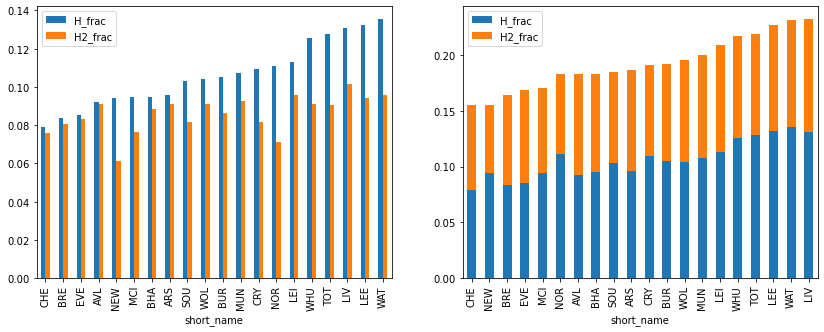

1 :  Dennis                                            Salah  &  Alexander-Arnold
2 :  Dias Belloli                                      Dennis  &  King
3 :  Salah                                             Dias Belloli  &  James
4 :  Son                                               Son  &  Lloris
5 :  Bowen                                             Bowen  &  Antonio
6 :  Maddison                                          Maddison  &  Vardy
7 :  Pukki                                             Borges Fernandes  &  de Gea


In [12]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
teams.sort_values('H_frac').plot.bar('short_name',y=['H_frac','H2_frac'], ax=ax[0])

teams.iloc[(teams['H_frac']+teams["H2_frac"]).sort_values().index].plot.bar('short_name',y=['H_frac','H2_frac'],stacked=True, ax=ax[1])
plt.show()

for i in range(7):
    name = teams.sort_values('H_frac', ascending=False)['HS'].iloc[i]
    print(i+1 , ': ' ,name , end = "")
    print((50-len(name))*' ', end = '')
    names = teams.iloc[(teams['H_frac']+teams["H2_frac"]).sort_values(ascending=False).index][['HS','HS2']].iloc[i]
    print(names[0], ' & ', names[1])

In [13]:
print('Fraction of Goals+Assists of Team best player has')
for t in teams.sort_values('G', ascending=False)['short_name']:
    print(t, ": ", players[players['Team']==t][['Name','G+A']].sort_values('G+A',ascending=False).iloc[0]['Name'],
          ": {0:.2f} ({1}/{2})".format(players[players['Team']==t][['Name','G+A']].sort_values('G+A',ascending=False).iloc[0]['G+A']/teams.set_index('short_name').loc[t,:][['G','A']].sum(),
                                       players[players['Team']==t][['Name','G+A']].sort_values('G+A',ascending=False).iloc[0]['G+A'],
                              teams.set_index('short_name').loc[t,:][['G','A']].sum()))

Fraction of Goals+Assists of Team best player has
LIV :  Salah : 0.23 (30/129)
MCI :  Mahrez : 0.11 (13/114)
CHE :  Mount : 0.15 (14/93)
WHU :  Bowen : 0.24 (21/89)
MUN :  Borges Fernandes : 0.18 (15/82)
LEI :  Maddison : 0.18 (13/73)
ARS :  Saka : 0.17 (12/69)
CRY :  Gallagher : 0.20 (14/70)
SOU :  Adams : 0.17 (10/60)
NEW :  Saint-Maximin : 0.17 (10/58)
TOT :  Son : 0.27 (17/64)
EVE :  Gray : 0.14 (8/56)
LEE :  Dias Belloli : 0.20 (11/55)
AVL :  Watkins : 0.14 (8/56)
BRE :  Toney : 0.17 (8/48)
WAT :  Dennis : 0.32 (15/47)
BHA :  Maupay : 0.24 (11/46)
WOL :  Jiménez : 0.21 (9/43)
BUR :  Cornet : 0.16 (6/37)
NOR :  Pukki : 0.27 (7/26)


In [14]:
print('Highest frac of team goals')

for i in range(20):
    team  = teams.iloc[(teams['TS']/teams['G']).sort_values(ascending=False).index]['short_name'].to_numpy()[i]
    print(players[players['Team']==team].sort_values('G', ascending=False).iloc[0]['Name'],
          ' ({0}): {1:.2f}'.format(team,(teams['TS']/teams['G']).sort_values(ascending=False).iloc[i]),
         ',\t Total Goals:  ', teams[teams['short_name']==team]['G'].values[0])


Highest frac of team goals
Pukki  (NOR): 0.46 ,	 Total Goals:   13
Dennis  (WAT): 0.36 ,	 Total Goals:   25
Cornet  (BUR): 0.35 ,	 Total Goals:   17
Maupay  (BHA): 0.35 ,	 Total Goals:   23
Son  (TOT): 0.32 ,	 Total Goals:   31
Dias Belloli  (LEE): 0.31 ,	 Total Goals:   29
Salah  (LIV): 0.27 ,	 Total Goals:   70
Vardy  (LEI): 0.26 ,	 Total Goals:   39
Smith Rowe  (ARS): 0.24 ,	 Total Goals:   37
Toney  (BRE): 0.23 ,	 Total Goals:   26
Adams  (SOU): 0.22 ,	 Total Goals:   32
Jiménez  (WOL): 0.22 ,	 Total Goals:   23
Gallagher  (CRY): 0.22 ,	 Total Goals:   37
dos Santos Aveiro  (MUN): 0.21 ,	 Total Goals:   42
Watkins  (AVL): 0.21 ,	 Total Goals:   29
Wilson  (NEW): 0.19 ,	 Total Goals:   31
Bowen  (WHU): 0.18 ,	 Total Goals:   44
Gray  (EVE): 0.17 ,	 Total Goals:   30
Sterling  (MCI): 0.16 ,	 Total Goals:   62
Mount  (CHE): 0.15 ,	 Total Goals:   48


In [15]:
print('Highest frac of team fantasy points')

for i in range(20):
    team  = teams.iloc[(teams['Points']).sort_values(ascending=False).index]['short_name'].to_numpy()[i]
    player = players[players['Team']==team].sort_values('P', ascending=False).iloc[0]['Name']
    pl_pts = players[players['Team']==team].sort_values('P', ascending=False).iloc[0]['P']
    print(player,
          ' ({0}): {1:.2f}'.format(team,(pl_pts/teams['Points'].sort_values(ascending=False).iloc[i])),
         ',\t Total Pts:  ', teams[teams['short_name']==team]['Points'].values[0])

Highest frac of team fantasy points
Salah  (LIV): 0.13 ,	 Total Pts:   1599
Cancelo  (MCI): 0.09 ,	 Total Pts:   1598
Rüdiger  (CHE): 0.08 ,	 Total Pts:   1367
Bowen  (WHU): 0.13 ,	 Total Pts:   1209
Borges Fernandes  (MUN): 0.11 ,	 Total Pts:   1184
Saka  (ARS): 0.10 ,	 Total Pts:   1150
Malheiro de Sá  (WOL): 0.10 ,	 Total Pts:   1106
Gallagher  (CRY): 0.11 ,	 Total Pts:   1089
Son  (TOT): 0.13 ,	 Total Pts:   1079
Ward-Prowse  (SOU): 0.10 ,	 Total Pts:   1018
Saint-Maximin  (NEW): 0.09 ,	 Total Pts:   966
Maupay  (BHA): 0.09 ,	 Total Pts:   960
Cash  (AVL): 0.09 ,	 Total Pts:   956
Maddison  (LEI): 0.11 ,	 Total Pts:   937
Toney  (BRE): 0.08 ,	 Total Pts:   931
Gray  (EVE): 0.09 ,	 Total Pts:   867
Pope  (BUR): 0.11 ,	 Total Pts:   855
Dennis  (WAT): 0.14 ,	 Total Pts:   805
Dias Belloli  (LEE): 0.13 ,	 Total Pts:   786
Pukki  (NOR): 0.11 ,	 Total Pts:   756


# Homemade FDR, Home and Away separate

In [16]:
import FPLFunctions as fpl
fix_off,fix_def, fix_off_fdr, fix_def_fdr, teams = fpl.AllInOneFDR(teams, GW=27, DGWS=[21,22,23,25,26,27,28,29])

C:\Users\matst\Documents\Python Scripts\FPLFunctions.py:66: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  fixtures = fixtures_xG[fixtures_xG['Event']<GW].dropna('index').append(fixtures[fixtures['Event']>=GW]) # !!! overwriting


In [17]:
#To make one really bad team not stand out like crazy and make every other team "hard"
easiest_score = sorted(fix_off_fdr.max(axis=1).unique())[-3]
#fix_off_fdr = fix_off_fdr.applymap(lambda x: min(x,easiest_score))
fix_off_fdr = fix_off_fdr.applymap(lambda x: np.log(x))
#easiest_score_def = sorted(fix_def_fdr.max(axis=1).unique())[-2]
#fix_def_fdr = fix_def_fdr.applymap(lambda x: min(x,easiest_score_def))
fix_def_fdr = fix_def_fdr.applymap(lambda x: np.log(x))

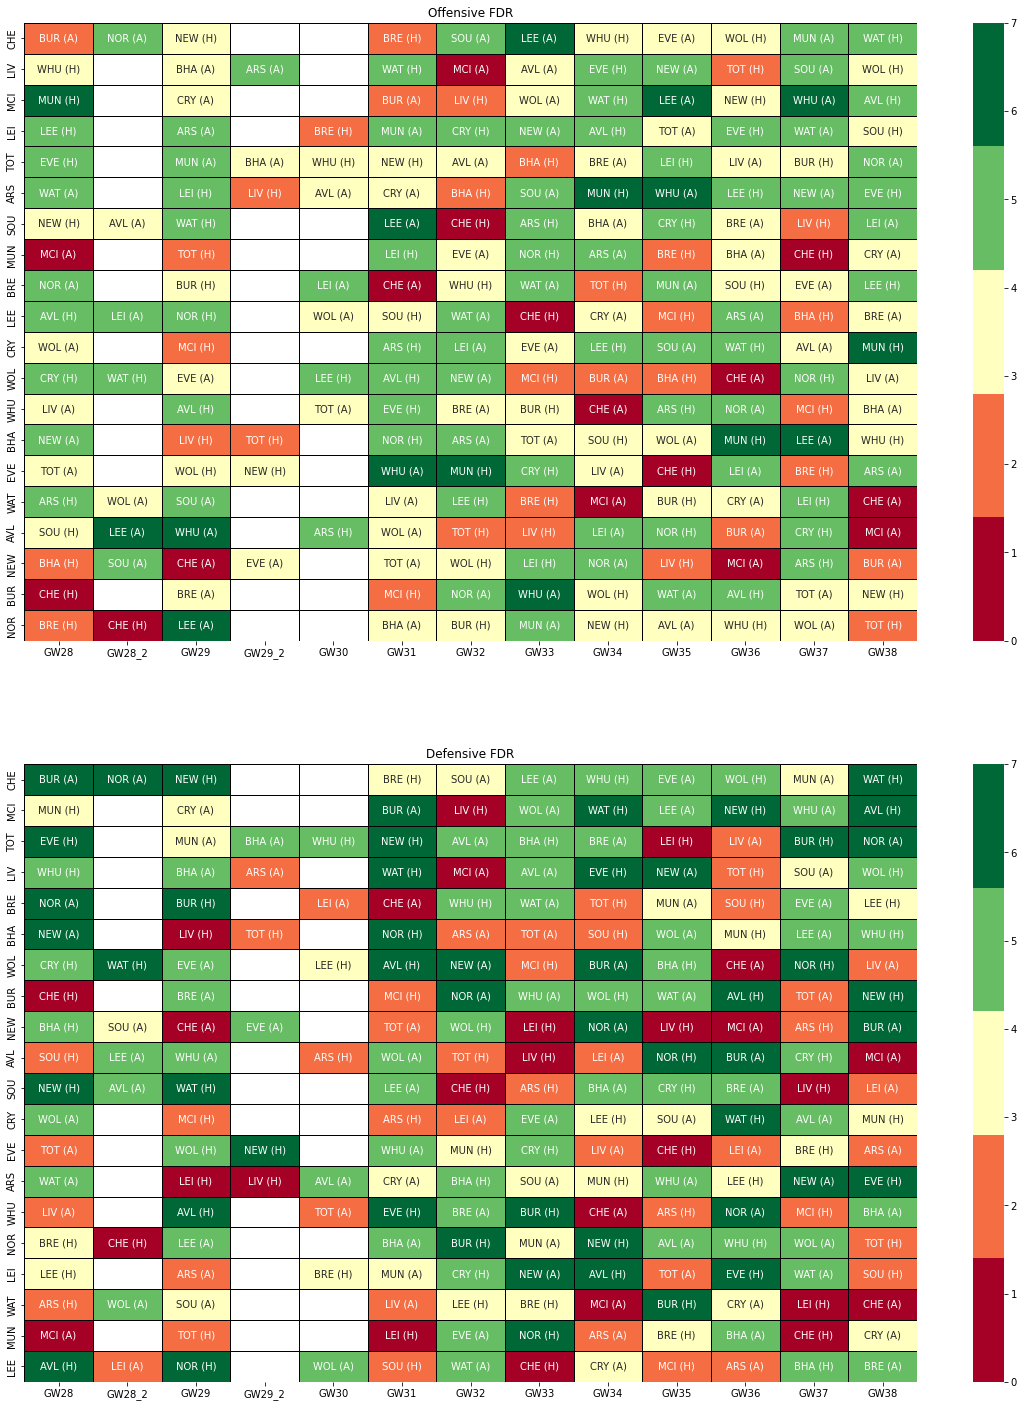

In [18]:
weeks_to_show = 20

#colors_def = ['#a50026','#f46d43','#fee08b','#ffffbf','#d9ef8b','#66bd63','#006837']

colors = ['#a50026','#f46d43','#ffffbf','#66bd63','#006837']
# red -> green

scaled_fdr_off = (fix_off_fdr-fix_off_fdr.min().min())/(fix_off_fdr.max().max()-fix_off_fdr.min().min())*7

#scaled_fdr_off = np.log(fix_off_fdr)

scaled_fdr_def = (fix_def_fdr-fix_def_fdr.min().min())/(fix_def_fdr.max().max()-fix_def_fdr.min().min())*7
scaled_fdr_def=scaled_fdr_def.max().max()-scaled_fdr_def

#scaled_fdr_def = np.log(scaled_fdr_def+0.1)

fig, ax = plt.subplots(2,1,figsize=(20,25))
sns.heatmap(scaled_fdr_off.iloc[:,:weeks_to_show],annot=fix_off.drop('name',axis=1).set_index('short_name').iloc[:,:weeks_to_show],fmt='s',
           cmap=colors, lw=0.5, linecolor='k', ax=ax[0])

sns.heatmap(scaled_fdr_def.iloc[:,:weeks_to_show],annot=fix_def.drop('name',axis=1).set_index('short_name').iloc[:,:weeks_to_show],fmt='s',
           cmap=colors, linewidth=0.5, linecolor='k', ax=ax[1])


ax[0].set_ylabel('')
ax[0].set_title('Offensive FDR')
ax[1].set_ylabel('')
ax[1].set_title('Defensive FDR')
plt.show()

In [27]:
print('Best Offensive streak')
#fix_off_fdr.iloc[:,:5].mean(1).sort_values(ascending=False)[:7]

#IF DGW:
pd.concat([fix_off_fdr.iloc[:,1],fix_off_fdr.iloc[:,2:6]],axis=1).mean(1).sort_values(ascending=False)[:7]

Best Offensive streak


short_name
SOU    2.658688
AVL    2.634810
WOL    2.606574
LIV    2.553877
LEI    2.516907
WHU    2.514135
EVE    2.511653
dtype: float64

In [35]:
fix_off_fdr.iloc[:,:2].fillna(0).mean(axis=1).sort_values(ascending=False)

short_name
AVL    2.669687
WOL    2.644265
LEE    2.585838
WAT    2.451344
CHE    2.424403
NEW    2.418147
SOU    2.390290
NOR    2.094082
MCI    1.364253
LEI    1.347651
ARS    1.323442
TOT    1.305402
BRE    1.296133
BHA    1.258445
LIV    1.193003
WHU    1.184186
EVE    1.177589
CRY    1.172343
MUN    0.968651
BUR    0.944292
dtype: float64

In [69]:
print('Best defensive streak')
#scaled_fdr_def.iloc[:,:5].mean(1).sort_values(ascending=False)[:7]

#IF DGW:
pd.concat([scaled_fdr_def.iloc[:,0],scaled_fdr_def.iloc[:,2:6]],axis=1).mean(1).sort_values(ascending=False)[:7]

Best defensive streak


short_name
AVL    5.504360
LEE    5.325036
LIV    5.307231
ARS    5.178779
NEW    5.117733
WAT    5.054142
MUN    4.992587
dtype: float64

# Player and Team xG Stuff

In [19]:
test = 'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F9%2Fshooting%2FPremier-League-Stats&div=div_stats_shooting'

In [20]:
player_stats = pd.read_html(test, header=1)[0]
player_stats = player_stats.drop([i for i in range(25,player_stats.shape[0]+1,26)])
player_stats.iloc[:,7:25]=player_stats.iloc[:,7:25].astype(float)
player_stats = player_stats.dropna()

In [21]:
player_stats['xG/Gl'] = player_stats[(player_stats['90s']>10) & (player_stats['Gls']>0.0)]['xG']/(player_stats[(player_stats['90s']>10) & (player_stats['Gls']>0.0)]['Gls'])

In [22]:
player_stats[player_stats['Gls']>4].sort_values('xG/Gl',ascending=True).head(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,xG/Gl
91,89,Maxwel Cornet,ci CIV,"FW,MF",Burnley,25-148,1996,10.1,6.0,23.0,...,3.0,0.0,0.0,2.3,2.3,0.1,3.7,3.7,Matches,0.383333
453,437,Emile Smith Rowe,eng ENG,"MF,FW",Arsenal,21-209,2000,15.3,9.0,29.0,...,0.0,0.0,0.0,3.8,3.8,0.13,5.2,5.2,Matches,0.422222
110,107,Kevin De Bruyne,be BEL,MF,Manchester City,30-239,1991,14.2,7.0,45.0,...,2.0,0.0,0.0,3.2,3.2,0.07,3.8,3.8,Matches,0.457143
391,377,Jacob Ramsey,eng ENG,MF,Aston Villa,20-270,2001,16.8,5.0,25.0,...,0.0,0.0,0.0,2.7,2.7,0.11,2.3,2.3,Matches,0.54
115,112,Emmanuel Dennis,ng NGA,"FW,MF",Watford,24-099,1997,19.2,9.0,43.0,...,4.0,0.0,0.0,5.1,5.1,0.12,3.9,3.9,Matches,0.566667


In [23]:
fixes = fpl.FixtureImport(teams)
fixes_xG = fpl.FixtureImportxG(teams,28)


C:\Users\matst\Documents\Python Scripts\FPLFunctions.py:66: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  fixtures = fixtures_xG[fixtures_xG['Event']<GW].dropna('index').append(fixtures[fixtures['Event']>=GW]) # !!! overwriting


In [24]:
def get_xG_x_diff(team):
    f_xG = fixes_xG[fixes_xG['Fin']==True]
    f = fixes[fixes['Fin']==True]
    diff = 0
    for i in ['H','A']:
        diff+=np.sum(f[f[i]==team][i+'_Score'].values-f_xG[f_xG[i]==team][i+'_Score'].values)
    return diff


In [25]:
teams['G-xG']=teams['short_name'].apply(lambda x: get_xG_x_diff(x))

In [26]:
alt.Chart(teams,title='Goals-xG for all teams').mark_bar().encode(
    x = alt.X('short_name',axis=alt.Axis(title='Team')),
    y = 'G-xG',
    color = alt.condition(alt.datum['G-xG']>0,        
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
)


alt.Chart(...)

In [37]:
pts = alt.Chart(player_stats[player_stats['Gls']>2],title='Goals vs. xG for Top Scorers').mark_circle(size=80).encode(
    y = alt.Y('Gls',axis=alt.Axis(title='Goals')),
    x = alt.X('xG',axis=alt.Axis(title='xG')),
    color = alt.Color('Pos',title='Position'),
    tooltip = ['Player','Squad','Gls','xG','npxG']
)
dummy = pd.DataFrame({'x':[0,player_stats['Gls'].max()]})

line = alt.Chart(dummy).mark_line(opacity=0.3).encode(
    x='x',
    y='x')
pts + line

alt.LayerChart(...)

In [69]:
def get_xG_last_10(team, end=-1):
    f_xG = fixes_xG[fixes_xG['Fin']==True]
    f_xG = f_xG[(f_xG['H']==team) | (f_xG['A']==team)][end-10:end]
    tot_xG = 0
    for i in ['H','A']:
        tot_xG+=np.sum(f_xG[f_xG[i]==team][i+'_Score'].values)
    return tot_xG/f_xG.shape[0]

def get_Goals_for_game(team, game=-1):
    f = fixes[fixes['Fin']==True]
    f = f[(f['H']==team) | (f['A']==team)]
    f = f.iloc[game]
    return f['H_Score'] if f['H']==team else f['A_Score']

In [70]:
teams['Avg_xG_before_last'] = teams['short_name'].apply(lambda x: get_xG_last_10(x))
teams['Goals_Last_Game'] = teams['short_name'].apply(lambda x: get_Goals_for_game(x))

In [71]:
df_xG_G = pd.DataFrame()
MIN_PLAYED = 22

for team in teams['short_name'].values:
    xG = [get_xG_last_10(team, end=i) for i in range(-(MIN_PLAYED-11),0)]
    G = [get_Goals_for_game(team, game=i) for i in range(-(MIN_PLAYED-11),0)]
    df_xG_G[team+'_xG'] = xG
    df_xG_G[team+'_G'] = G
    

In [81]:
goals_df = pd.DataFrame()
for team in teams['short_name'].values:
    goals_pr_week = [get_Goals_for_game(team, game=i) for i in range(-MIN_PLAYED,0)]
    goals_df[team] = goals_pr_week

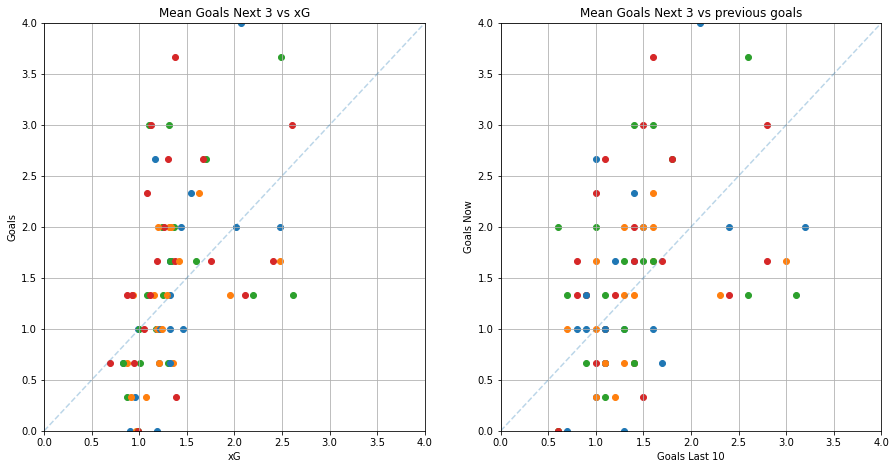

Pearson Correlation
xG: 0.51, with p-value 1.02e-06
Goals: 0.43, with p-value 7.37e-05
Spearman Correlation
xG: 0.58, with p-value 1.64e-08
Goals: 0.48, with p-value 5.36e-06


In [94]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))
avg_xG_first_games = []
avg_goals_last_games = []
avg_goals_first_games = []

for t in teams['short_name'].values:
    for i in range(4):
        ax[0].scatter(df_xG_G[t+'_xG'][i],np.mean(df_xG_G.loc[i:i+2,t+'_G']),color='C'+str(i))
        ax[1].scatter(np.mean(goals_df.loc[1+i:10+i,t]),np.mean(goals_df.loc[11+i:13+i,t]),color='C'+str(i))
        avg_goals_first_games.append(np.mean(goals_df.loc[1+i:10+i,t]))
        avg_xG_first_games.append(df_xG_G[t+'_xG'][i])
        avg_goals_last_games.append(np.mean(df_xG_G.loc[i:i+2,t+'_G']))
    #print(sp.stats.pearsonr(df_xG_G[t+'_xG'],df_xG_G[t+'_G'])[0])

for i in range(2):
    ax[i].plot([0,4],[0,4],'--',alpha=0.3)
    ax[i].set_xlim(0,4)
    ax[i].set_ylim(0,4)
    ax[i].grid()

ax[0].set_xlabel('xG')
ax[0].set_ylabel('Goals')
ax[0].set_title('Mean Goals Next 3 vs xG')
ax[1].set_xlabel('Goals Last 10')
ax[1].set_ylabel('Goals Now')
ax[1].set_title('Mean Goals Next 3 vs previous goals')


plt.show()

print('Pearson Correlation')
print('xG: {0:.2f}, with p-value {1:.2e}'.format(sp.stats.pearsonr(avg_xG_first_games,avg_goals_last_games)[0],
                                                         sp.stats.pearsonr(avg_xG_first_games,avg_goals_last_games)[1]))
print('Goals: {0:.2f}, with p-value {1:.2e}'.format(sp.stats.pearsonr(avg_goals_first_games,avg_goals_last_games)[0],
                                                         sp.stats.pearsonr(avg_goals_first_games,avg_goals_last_games)[1]))

xG_spearman_r, xG_spearman_p = sp.stats.spearmanr(avg_xG_first_games,avg_goals_last_games)
G_spearman_r, G_spearman_p = sp.stats.spearmanr(avg_goals_first_games,avg_goals_last_games)
print('Spearman Correlation')
print('xG: {0:.2f}, with p-value {1:.2e}'.format(xG_spearman_r, xG_spearman_p))
print('Goals: {0:.2f}, with p-value {1:.2e}'.format(G_spearman_r, G_spearman_p))

In [349]:
ps = player_stats[player_stats['Pos'].apply(lambda x: player_stats['Pos'].value_counts()[x]>10)]

In [351]:
ps.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches',
       'xG/Gl'],
      dtype='object')

In [331]:
print(ps.shape)
ps = ps[ps['90s'].astype(float)>13]
ps.loc[:,'Pos'] = ps.loc[:,'Pos'].where((ps['Pos']!='MF,FW'),other='MW')
ps.loc[:,'Pos'] = ps.loc[:,'Pos'].where((ps['Pos']!='FW,MF'),other='MW')
ps.loc[:,'Sh']=ps['Sh'].astype(float)
ps = ps[['Pos','Sh','Squad']]
#ps = ps[ps['SoT']>5]
#ps = ps[ps['SoT']<20]
print(ps.shape)

(322, 27)
(166, 3)


In [336]:
ps = pd.merge(ps,ps.groupby('Pos').mean().reset_index(),on='Pos', suffixes =['','_mean'])
ps = pd.merge(ps,ps.groupby('Squad').mean().reset_index()[['Squad','Sh']],on='Squad', suffixes =['','_sq_mean'])

In [337]:
ps.head(5)

,Pos,Sh,Squad,Sh_mean,Sh_sq_mean
0,DF,10.0,Norwich City,13.223881,18.444444
1,DF,8.0,Norwich City,13.223881,18.444444
2,DF,12.0,Norwich City,13.223881,18.444444
3,FW,34.0,Norwich City,44.482759,18.444444
4,MF,9.0,Norwich City,22.953488,18.444444


array([[<AxesSubplot:title={'center':'Sh'}>]], dtype=object)

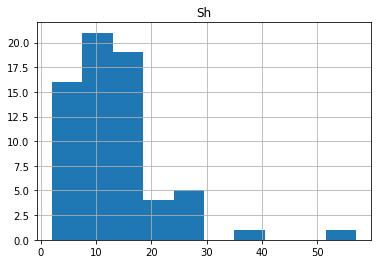

In [318]:
ps[ps['Pos']=='DF'].hist('Sh')

In [348]:
ps.Sh_sq_mean.unique().max()

39.44444444444444

In [343]:
step=20
overlap=3

grp = 'Squad'
rel_mean = 'Sh_sq_mean'

alt.Chart(ps,height=step,width=300).transform_bin(
    ['bin_max','bin_min'],'Sh'
).transform_aggregate(
    value='count()',groupby=[grp,rel_mean,'bin_min','bin_max']
).transform_impute(
    impute='value', groupby=[grp, rel_mean], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8, stroke='lightgray',strokeWidth=0.5
).encode(alt.X('bin_min:Q',bin='binned',title='Shots on Target'),
        alt.Y('value:Q',scale=alt.Scale(range=[step, -step * overlap]),
        axis=None
             ),
    alt.Fill(rel_mean+':Q',legend=None,scale=alt.Scale(domain=[45,13], scheme='redyellowblue')
            )
        ).facet(
    row=alt.Row(
        grp,
        title=None,
        header=alt.Header(labelAngle=0, labelAlign='right')
    )
).properties(
    title='Shots On Target',
    bounds='flush'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)





alt.FacetChart(...)

In [352]:
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

In [364]:
alt.Chart(counties,height=400,width=500).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source,'id',['rate'])
).project('albersUsa')

alt.Chart(...)